## 🛠️ Mod5 Data Challenge 1: ETL-in-the-Wild — Cleaning Civic Data for Product Insights

### 🎯 Purpose

Practice applying the "Transform" step of an ETL pipeline using a real-world dataset—NYC 311 Service Requests. You’ll clean, standardize, and engineer features to prep the data for downstream analysis and business reporting.

### 📚 KSBs

K14 – Strategic feature engineering to improve analysis outcomes

S5 – Data transformation techniques in Python

S8 – Uses Pandas for EDA and data manipulation

B4 – Exercises critical judgment about data quality and reliability

B6 – Pursues deeper insights beyond surface-level observations

### Data
Use the **nyc311.csv** file located in your Github's `data` folder within Mod5/DataChallenges.  This is a sample of the originial file looking at just one week of data since the dataset is HUGE.  Read more about the columns [HERE](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data).   

### 👩‍🏫 Instructor-Led Demo (15 minutes)

#### Step 1:  Load + Preview 
* Read in data

* Show .head(), .info() to examine structure and datatypes

In [2]:
import pandas as pd
df = pd.read_csv('/Users/kabbo/Downloads/nyc311.csv')

#### Step 2:  Clean up Categorical Variable 

* Normalize Borough & Complaint Type (e.g., strip whitespace, title-case or upper-case values)

* Show .value_counts() before and after cleaning

In [3]:
# Strip whitespace and standardize case
for col in ["Complaint Type", "Borough"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# pick a style (title-case often reads nicely)
df["Complaint Type"] = df["Complaint Type"].str.title()
df["Borough"] = df["Borough"].str.title()

# quick sanity checks
display(df["Complaint Type"].value_counts().head(10))
display(df["Borough"].value_counts())

Complaint Type
Illegal Parking            10654
Noise - Residential         6603
Noise - Street/Sidewalk     4532
Blocked Driveway            3002
Unsanitary Condition        1539
Noise - Commercial          1411
Dirty Condition             1176
Abandoned Vehicle           1050
Street Condition            1032
Noise                       1023
Name: count, dtype: int64

Borough
Brooklyn         17102
Queens           14668
Manhattan        11729
Bronx            10041
Staten Island     2226
Unspecified         49
Name: count, dtype: int64

#### Step 3:  Feature Engineering

* Convert Created Date to datetime

* Create a new feature: is_weekend based on weekday

In [4]:
df["Created Date"] = pd.to_datetime(df["Created Date"])

# is_weekend flag
#df["is_weekend"] = 

df["Created Date"].dt.day_of_week > 5

0        False
1        False
2        False
3        False
4        False
         ...  
55810    False
55811    False
55812    False
55813    False
55814    False
Name: Created Date, Length: 55815, dtype: bool

### 👩‍💻 Student-Led Section (30 minutes)

#### Task1:  Clean & Filter

* Drop rows with missing Created Date or Closed Date

* Drop duplicate rows

* Filter data to only include one borough (e.g., Brooklyn)

In [ ]:
# 1a) Drop rows with missing Created/Closed Date
df = df.dropna(subset=['Created Date', 'Closed Date'])

# 1b) Drop duplicates
df = df.drop_duplicates()

# 1c) Filter to a single borough (STUDENT CHOICE)
borough_name = "Queens"  # e.g., "Brooklyn"
df_b = df[df["Borough"] == borough_name].copy()
df_b.shape

(11509, 41)

#### Task2:  Time Transformations 

* Create a new column `response_time_hrs` = difference between Closed Date and Created Date (in hours)

* Ensure datetime types are properly parsed and timezone-aware (localize to America/New_York → convert to UTC)

In [6]:
# RUN THIS CELL WITHOUT CHANGES!!!! 

LOCAL_TZ = "America/New_York"

def to_utc(series, local_tz=LOCAL_TZ):
    # 1) parse
    s = pd.to_datetime(series, errors="coerce")

    # 2) if naive -> localize; if tz-aware -> skip (KEEP NONE in this if statement)
    if s.dt.tz is None:
        s = s.dt.tz_localize(local_tz, nonexistent="shift_forward", ambiguous="NaT")

    # 3) convert whatever tz it has to UTC
    return s.dt.tz_convert("UTC")

In [7]:
# Convert both columns to utc
df_b["Created Date"] = to_utc(df_b["Created Date"])
df_b["Closed Date"]  = to_utc(df_b["Closed Date"])

# Now compute the response time
delta = df_b["Closed Date"] - df_b["Created Date"]
df_b["response_time_hrs"] = delta.dt.total_seconds() / 3600

# Check the data with a .head()
df_b.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,response_time_hrs
7,66176906,2025-09-17 05:49:53+00:00,2025-09-17 07:00:34+00:00,DHS,Department of Homeless Services,Homeless Person Assistance,Non-Chronic,Store/Commercial,11385.0,55-25 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699957,-73.907722,"(40.69995662802054, -73.90772175534917)",1.178056
37,66170659,2025-09-17 05:33:27+00:00,2025-09-17 05:42:59+00:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419.0,111-01 101 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.688089,-73.832615,"(40.68808859339035, -73.8326146957164)",0.158889
50,66178986,2025-09-17 05:26:39+00:00,2025-09-17 05:28:51+00:00,NYPD,New York City Police Department,Non-Emergency Police Matter,Other (complaint details),Street/Sidewalk,11374.0,98-30 67 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.725022,-73.855031,"(40.72502241781684, -73.8550310677977)",0.036667
69,66174633,2025-09-17 05:14:11+00:00,2025-09-17 06:47:24+00:00,DHS,Department of Homeless Services,Homeless Person Assistance,Non-Chronic,Street/Sidewalk,11385.0,55-25 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699957,-73.907722,"(40.69995662802054, -73.90772175534917)",1.553611
74,66176165,2025-09-17 05:09:02+00:00,2025-09-17 05:26:20+00:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11419.0,95 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.690553,-73.834044,"(40.690552726198774, -73.83404367692309)",0.288333


#### Task3:  Feature Engineer

* Create `hour_of_day` from Created Date

* Create `is_high_priority`: True if Complaint Type is in a list of priority complaints (e.g., ["HEAT/HOT WATER", "ELECTRIC", "STRUCTURAL"])

In [17]:
# hour_of_day from Created Date 
df_b["hour_of_day"] = df_b["Created Date"].dt.hour

# define a high-priority list (STUDENT CHOICE)
priority_list = ["Heat/Hot Water"]  # e.g., ["Heat/Hot Water","Electric","Elevator","Structural"]
df_b["is_high_priority"] = df_b["Complaint Type"].isin(priority_list)

display(df_b[["Complaint Type","hour_of_day","is_high_priority"]].head(5))

,Complaint Type,hour_of_day,is_high_priority
7,Homeless Person Assistance,5,False
37,Blocked Driveway,5,False
50,Non-Emergency Police Matter,5,False
69,Homeless Person Assistance,5,False
74,Illegal Parking,5,False


#### Task4:  Aggregates & Visuals 

* Average response time by Complaint Type (sorted descending)

* Total number of complaints by hour_of_day (bar chart)

In [18]:
# Average response time by complaint type (descending)
avg_resp = (df_b.groupby("Complaint Type", dropna=False)["response_time_hrs"].mean().sort_values(ascending=False).reset_index())
display(avg_resp.head(10))

,Complaint Type,response_time_hrs
0,Drinking Water,122.978333
1,Root/Sewer/Sidewalk Condition,98.179167
2,Flooring/Stairs,93.559563
3,Appliance,90.675093
4,Illegal Posting,88.732531
5,Dumpster Complaint,87.003611
6,Door/Window,81.591042
7,Water Leak,79.124419
8,Sanitation Worker Or Vehicle Complaint,69.638667
9,Unsanitary Condition,68.108110


In [22]:
print(df.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')


/var/folders/78/8f22v_ln4kvg9b_7fr3_2nfh0000gn/T/ipykernel_94478/474683105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_complaints.index, y=hourly_complaints.values, palette="viridis")


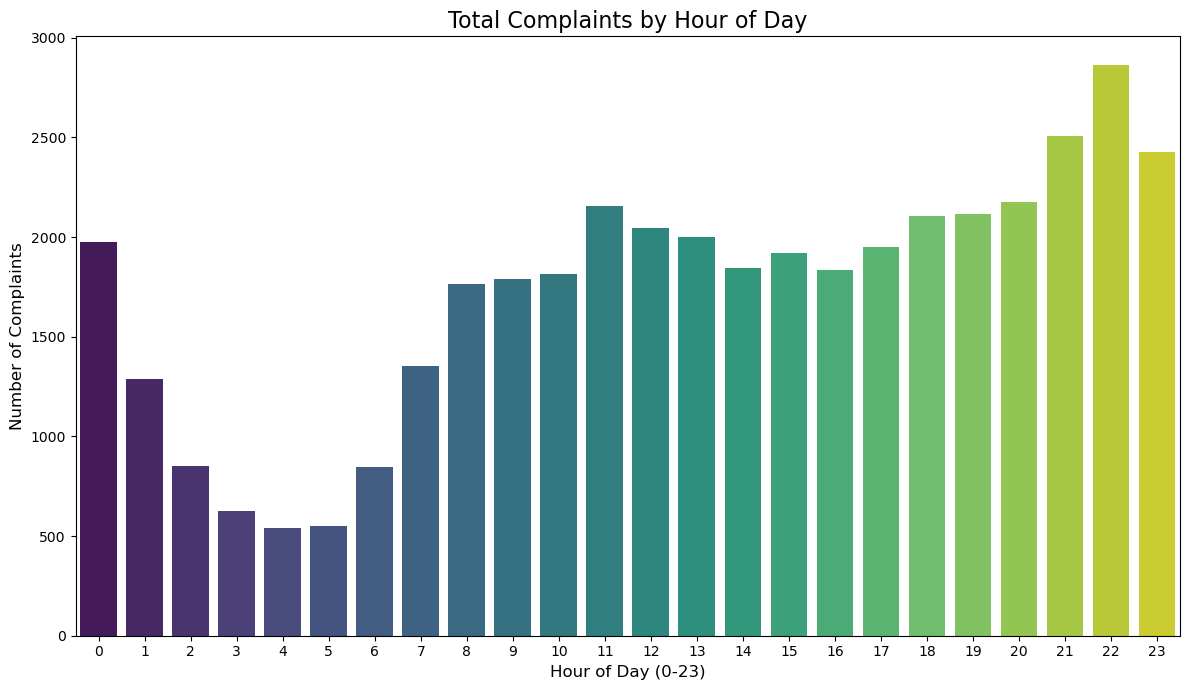

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the figure size for better readability
plt.figure(figsize=(12, 7))

sns.barplot(x=hourly_complaints.index, y=hourly_complaints.values, palette="viridis")

# Add a clear title and labels
plt.title('Total Complaints by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### Notebook Reflection

Answer the questions in a markdown cell below.  Be thorough (no need to use AWES just answer the question fully)

1. Describe one transformation or feature you engineered (e.g., response_time_hrs, is_high_priority) and explain why it would be useful for a city analyst or operations manager.
One key feature engineered in this notebook is response_time_hrs. This feature was created by first ensuring the Created Date and Closed Date columns were properly converted to timezone-aware datetime objects (localized to 'America/New_York' and then converted to UTC for standardization). Then, the difference between the Closed Date and Created Date was calculated, and this duration was converted into hours.

For a City Analyst: This feature allows for quantitative analysis of the city's operational efficiency. An analyst can aggregate this data to identify which complaint types have the longest or shortest resolution times on average, as demonstrated in the notebook (avg_resp table). They could further segment this data by borough, time of day, or day of the week to uncover deeper trends.

For an Operations Manager: This feature serves as a critical Key Performance Indicator (KPI). A manager can use it to set service-level agreement (SLA) targets for different complaint categories and monitor their team's performance against these goals. If the average response time for "Blocked Driveway" complaints starts to increase, the manager can investigate immediately. It helps pinpoint bottlenecks in the workflow, identify high-performing teams or shifts, and make informed decisions about staffing levels needed to meet demand and maintain service quality for citizens.

2. What could go wrong if you didn’t clean the datetime fields properly or skipped removing rows with missing Closed Date? How might that distort future dashboards or decisions?

Failing to properly clean datetime fields and handle missing values would introduce significant errors into the analysis, leading to distorted dashboards and flawed decision-making.

Consequences of Improper Datetime Cleaning:

Inaccurate Calculations: If timezones are not handled correctly (e.g., by localizing to 'America/New_York' and converting to UTC), the calculation of response_time_hrs would be wrong. For instance, a complaint made during a Daylight Saving Time shift could have its duration miscalculated by an hour. This would make any analysis of response times unreliable.

Faulty Trend Analysis: Features derived from datetime objects, such as hour_of_day, would be incorrect if based on naive timestamps. A complaint logged at 10 PM EST is hour 22, but in UTC it would be hour 2 or 3 of the next day. A dashboard plotting complaints by hour would show misleading peaks and troughs, potentially causing a manager to misallocate staff to the wrong shifts.

Consequences of Not Removing Rows with Missing Closed Date:

Skewed Averages: A missing Closed Date typically means the service request is still open. If these rows are not removed, any attempt to calculate response_time_hrs would result in a null (NaN) value. When calculating an average, these nulls might be silently dropped or, if improperly handled, could be treated as zero. Treating them as zero would drastically and artificially lower the average response time, making a department appear far more efficient than it actually is.

Distorted Dashboards and Decisions: A dashboard built on this flawed data would present a misleading picture of reality. A city manager might see a low average response time for "Unsanitary Condition" complaints and conclude that no action is needed. In reality, the low average could be masking a large backlog of unresolved, open cases that were not properly excluded from the calculation. This would lead to poor resource allocation, unresolved civic issues, and a decline in the quality of city services.

### 📣 Class Share-Out (15 minutes)

Be ready to share out the following points with the class: 

📣 Explain:

How average response_time_hrs by complaint type offers insight (e.g., “Elevator complaints take longer to resolve”)

What does your chosen borough trends reveal (e.g., “Most heating complaints come in before 10am”)

🛠️ Propose:

One next transformation step you would include in the full data pipeline (e.g., flagging overdue requests)

